# factor_demo

## 导入模块

In [1]:
import sys
sys.path.append('../../public-Git/')

from demo_Alpha.factor_function import *
from utils.stg_functions_local import *
from utils.performance import corr_local_V2

%matplotlib inline

## 定义股票池和基准指数

In [2]:
stock_universe = '999998'
index_code = '000905'

## 定义因子类

### 跳跃收益因子

In [3]:
class fill_ret_jump(Factor):
    name = 'fill_ret_jump'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/ret_jump/fill_neutral_ret_jump.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

In [4]:
class ret_jump_daily(Factor):
    name = 'ret_jump_daily'
    islimitbuy = True
    islimitsell = True
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/ret_jump_daily/neutral_ret_jump.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

### 点度中心性因子

In [5]:
class N_connect(Factor):
    name = 'fill_N_connect'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/N_connect_1_any/fill_neutral_N_connect_num.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

### 跳跃关联动量因子

In [6]:
class peer_relative_ret(Factor):
    name = 'fill_peer_relative_ret'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/peer_ret/fill_neutral_peer_without_posjump_num.feather')
        factor = factor.pivot(index='date', columns='issue', values='peer_relative_ret')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

## 回测

开始计算fill_peer_relative_ret
因子数据计算完成，耗时0:00:02.359352
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
fill_peer_relative_ret------输出对标超额收益模式指标
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-0.096032,-0.007021,-0.016563,0.005811,128494,99.0,2.33
2,-0.024385,-0.005855,-0.011776,0.003277,127909,99.0,2.32
3,-0.020445,-0.004912,-0.009887,0.002823,127849,98.0,2.32
4,-0.017746,-0.004251,-0.008601,0.002522,127899,98.0,2.32
5,-0.015944,-0.003747,-0.007613,0.002286,127713,98.0,2.32
6,-0.014168,-0.003298,-0.006794,0.002086,127883,98.0,2.32
7,-0.012782,-0.002928,-0.006090,0.001921,128007,99.0,2.32
8,-0.011664,-0.002612,-0.005460,0.001769,127843,98.0,2.32
9,-0.010661,-0.002317,-0.004884,0.001622,127844,98.0,2.32


Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.041
Quantile 2 Mean Turnover,0.048
Quantile 3 Mean Turnover,0.050
Quantile 4 Mean Turnover,0.051
Quantile 5 Mean Turnover,0.052
Quantile 6 Mean Turnover,0.052
Quantile 7 Mean Turnover,0.052
Quantile 8 Mean Turnover,0.053
Quantile 9 Mean Turnover,0.053
Quantile 10 Mean Turnover,0.053


,1D
Mean Factor Rank Autocorrelation,0.976




benchmark AnalysisMode Returns Analysis 


,1D
Top Ret,11.33
Bottom Ret,-4.69
Top RetAE,10.42
Bottom RetAE,-6.00
Top RetAE MDD,-21.89
Top RetAE SPR,0.81




benchmark AnalysisMode Returns Analysis By Year 


,Top Ret,Top RetAE,Bottom Ret,Bottom RetAE,Spread Ret,Spread RetAE,RetAE Top SPR,RetAE Top MDD
date,,,,,,,,
2019,-11.84,-12.31,-11.92,-12.74,0.08,-1.21,-1.41,-5.40
2020,-8.66,-9.44,-6.09,-7.39,-2.57,-4.65,-0.66,-17.43
2021,17.04,16.07,-3.77,-5.22,20.81,18.38,1.19,-9.03
2022,25.67,24.53,-0.48,-1.88,26.15,23.61,1.99,-6.50
2023,14.59,13.60,0.40,-0.94,14.19,11.86,1.56,-6.22
2024,15.86,15.05,-11.13,-12.35,26.98,24.96,0.99,-13.37




Information Analysis


,1D
IC Mean,0.021
IR,0.178
Good IC Ratio,0.865
IC Mean SD_20D,0.170
IR SD_20D,0.313
IC Mean SD_60D,0.249
IR SD_60D,0.516




                                      1D
Top RetAE                      10.422238
Top RetAE MDD                 -21.890909
Top RetAE SPR                   0.814073
IC_20                           0.169604
IR_20                           0.313263
IC_60                           0.249123
IR_60                           0.515807
Bottom RetAE                   -6.000655
Mean turnover Top Quantile      0.041472
Mean turnover Bottom Quantile   0.028843
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
fill_peer_relative_ret------输出贴近实际交易的净值模式指标
                            value
Annualized Return(%)     9.141637
Annualized ReturnAE(%)   7.95879

<Figure size 640x480 with 0 Axes>

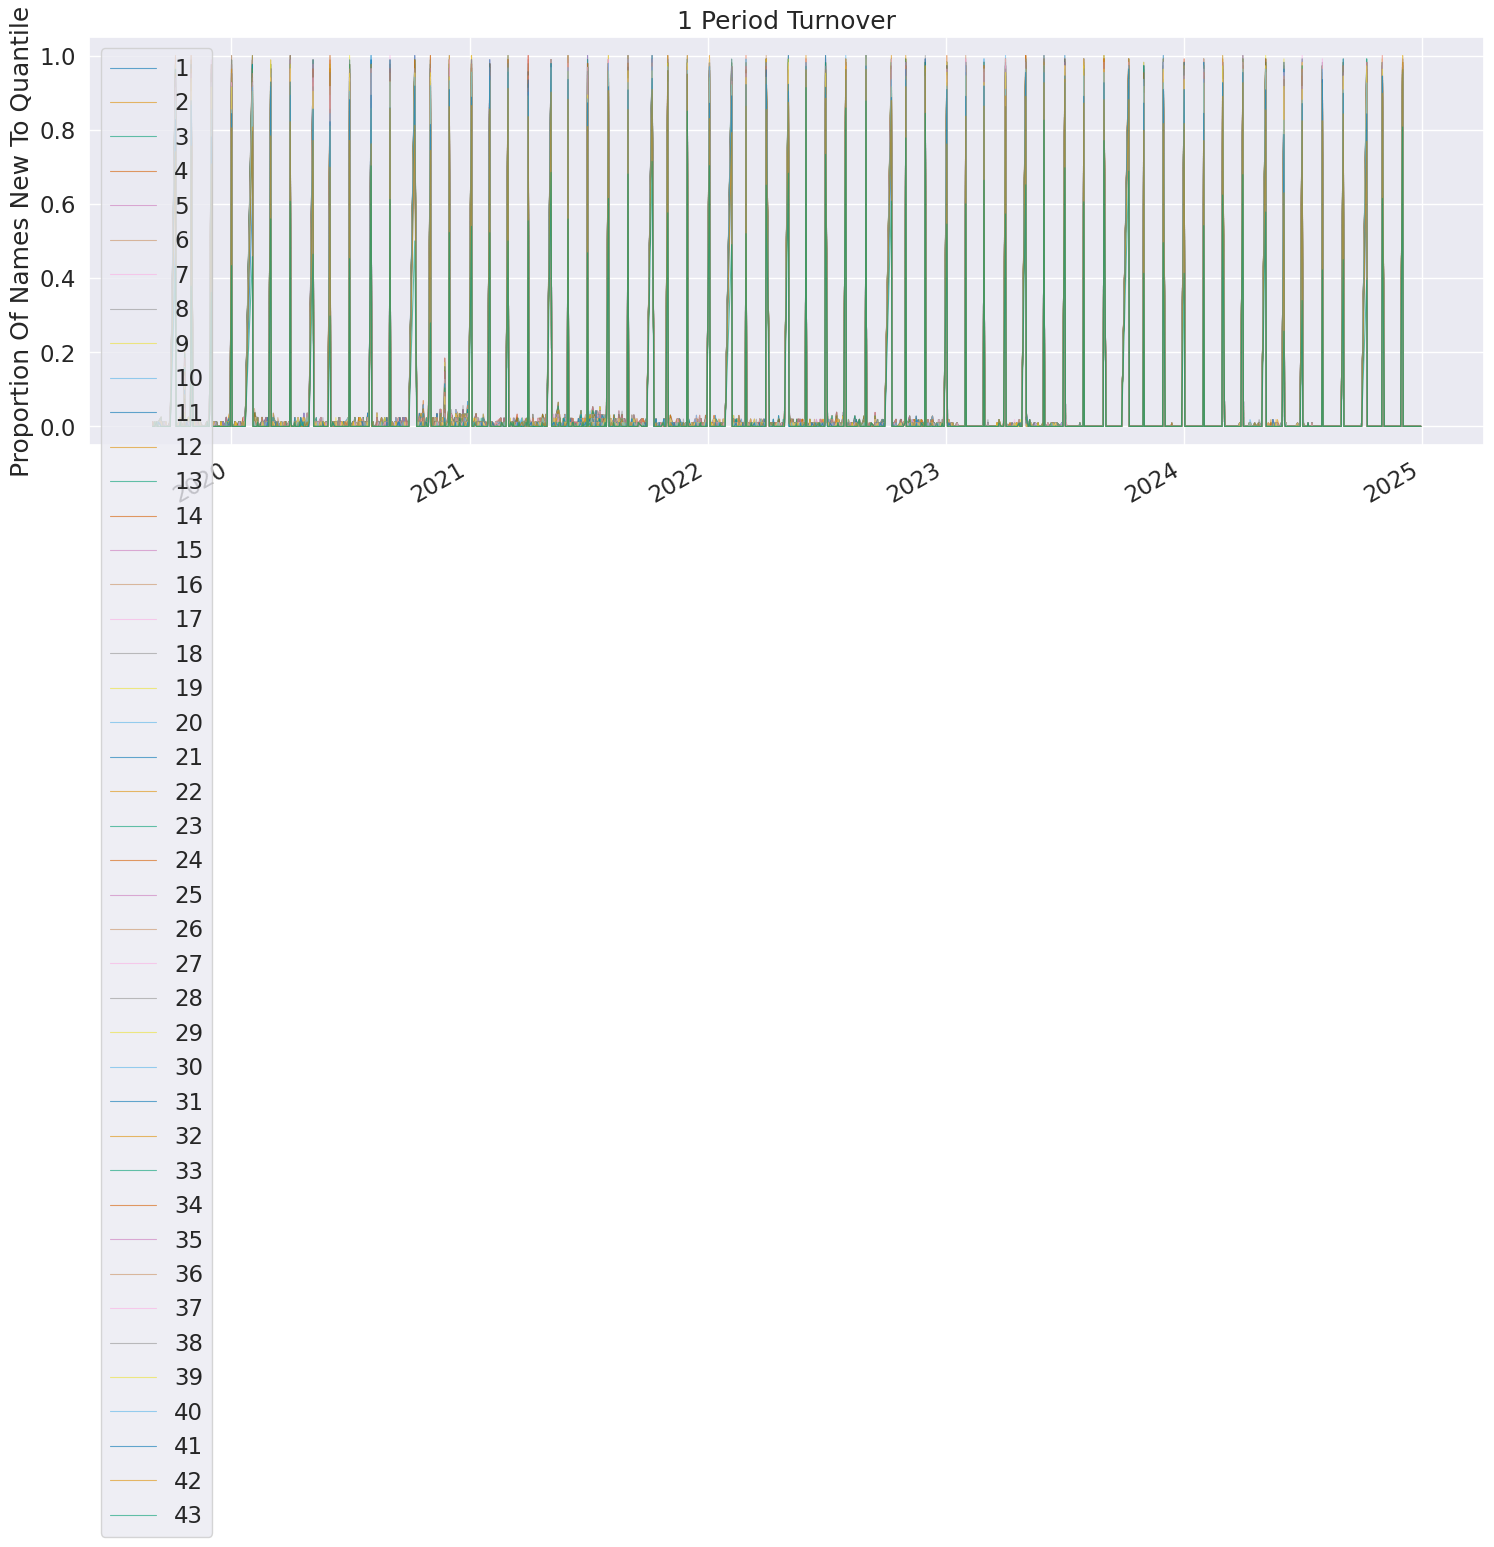

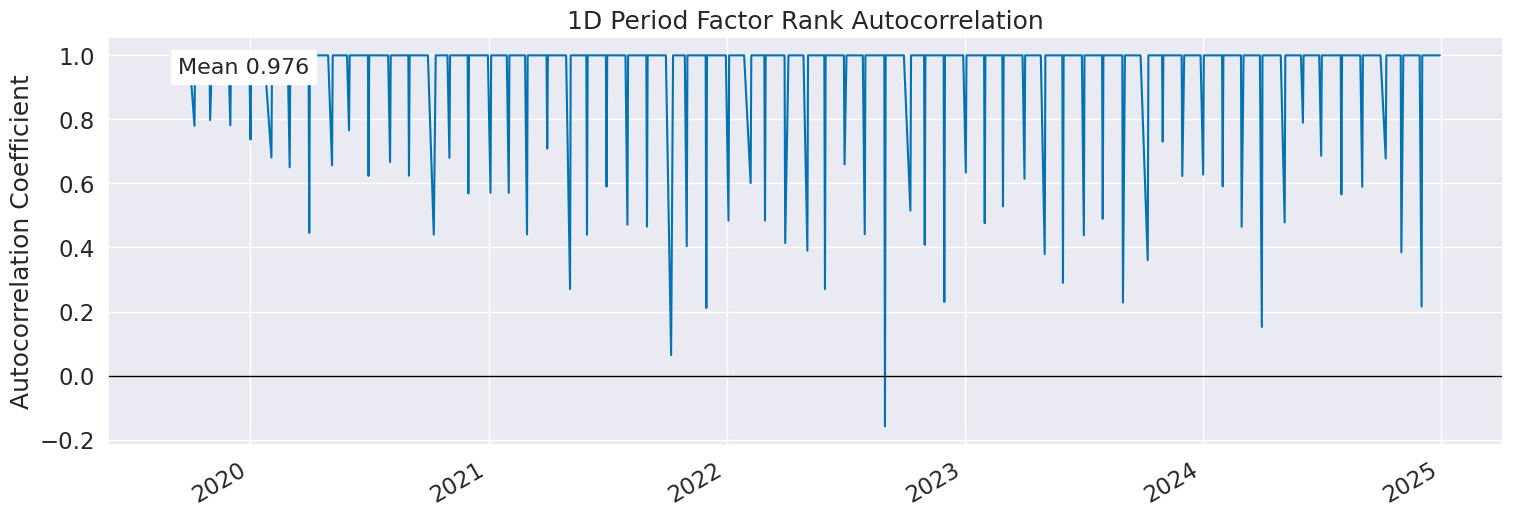

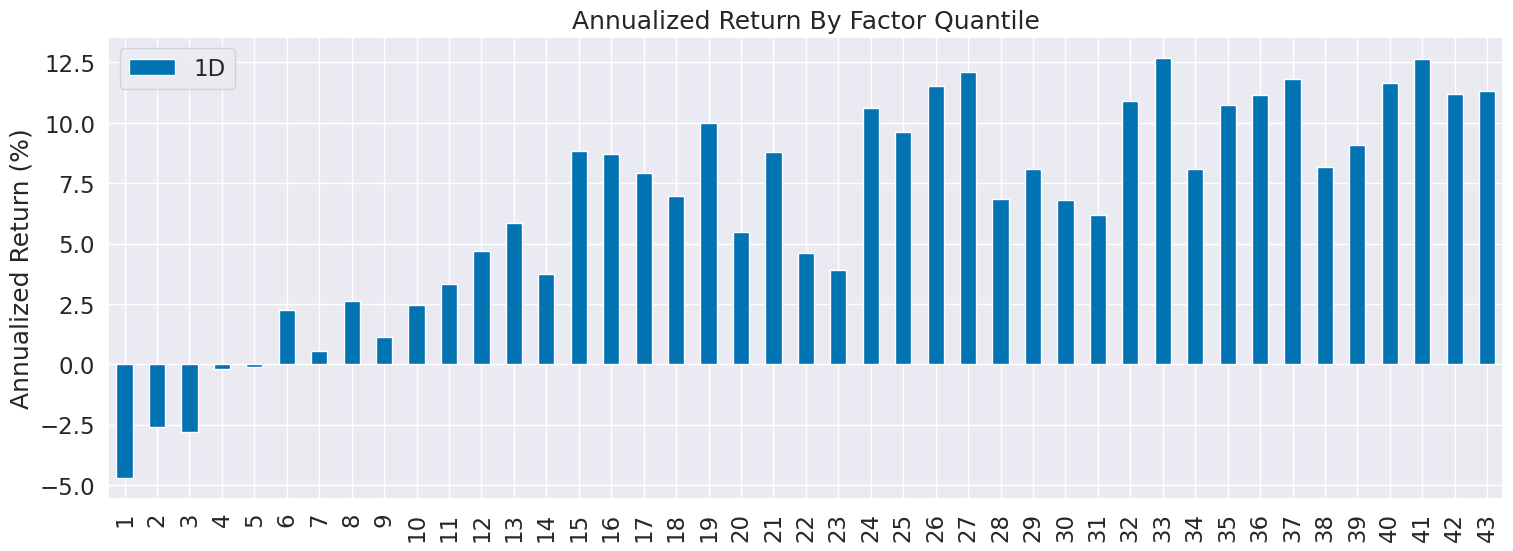

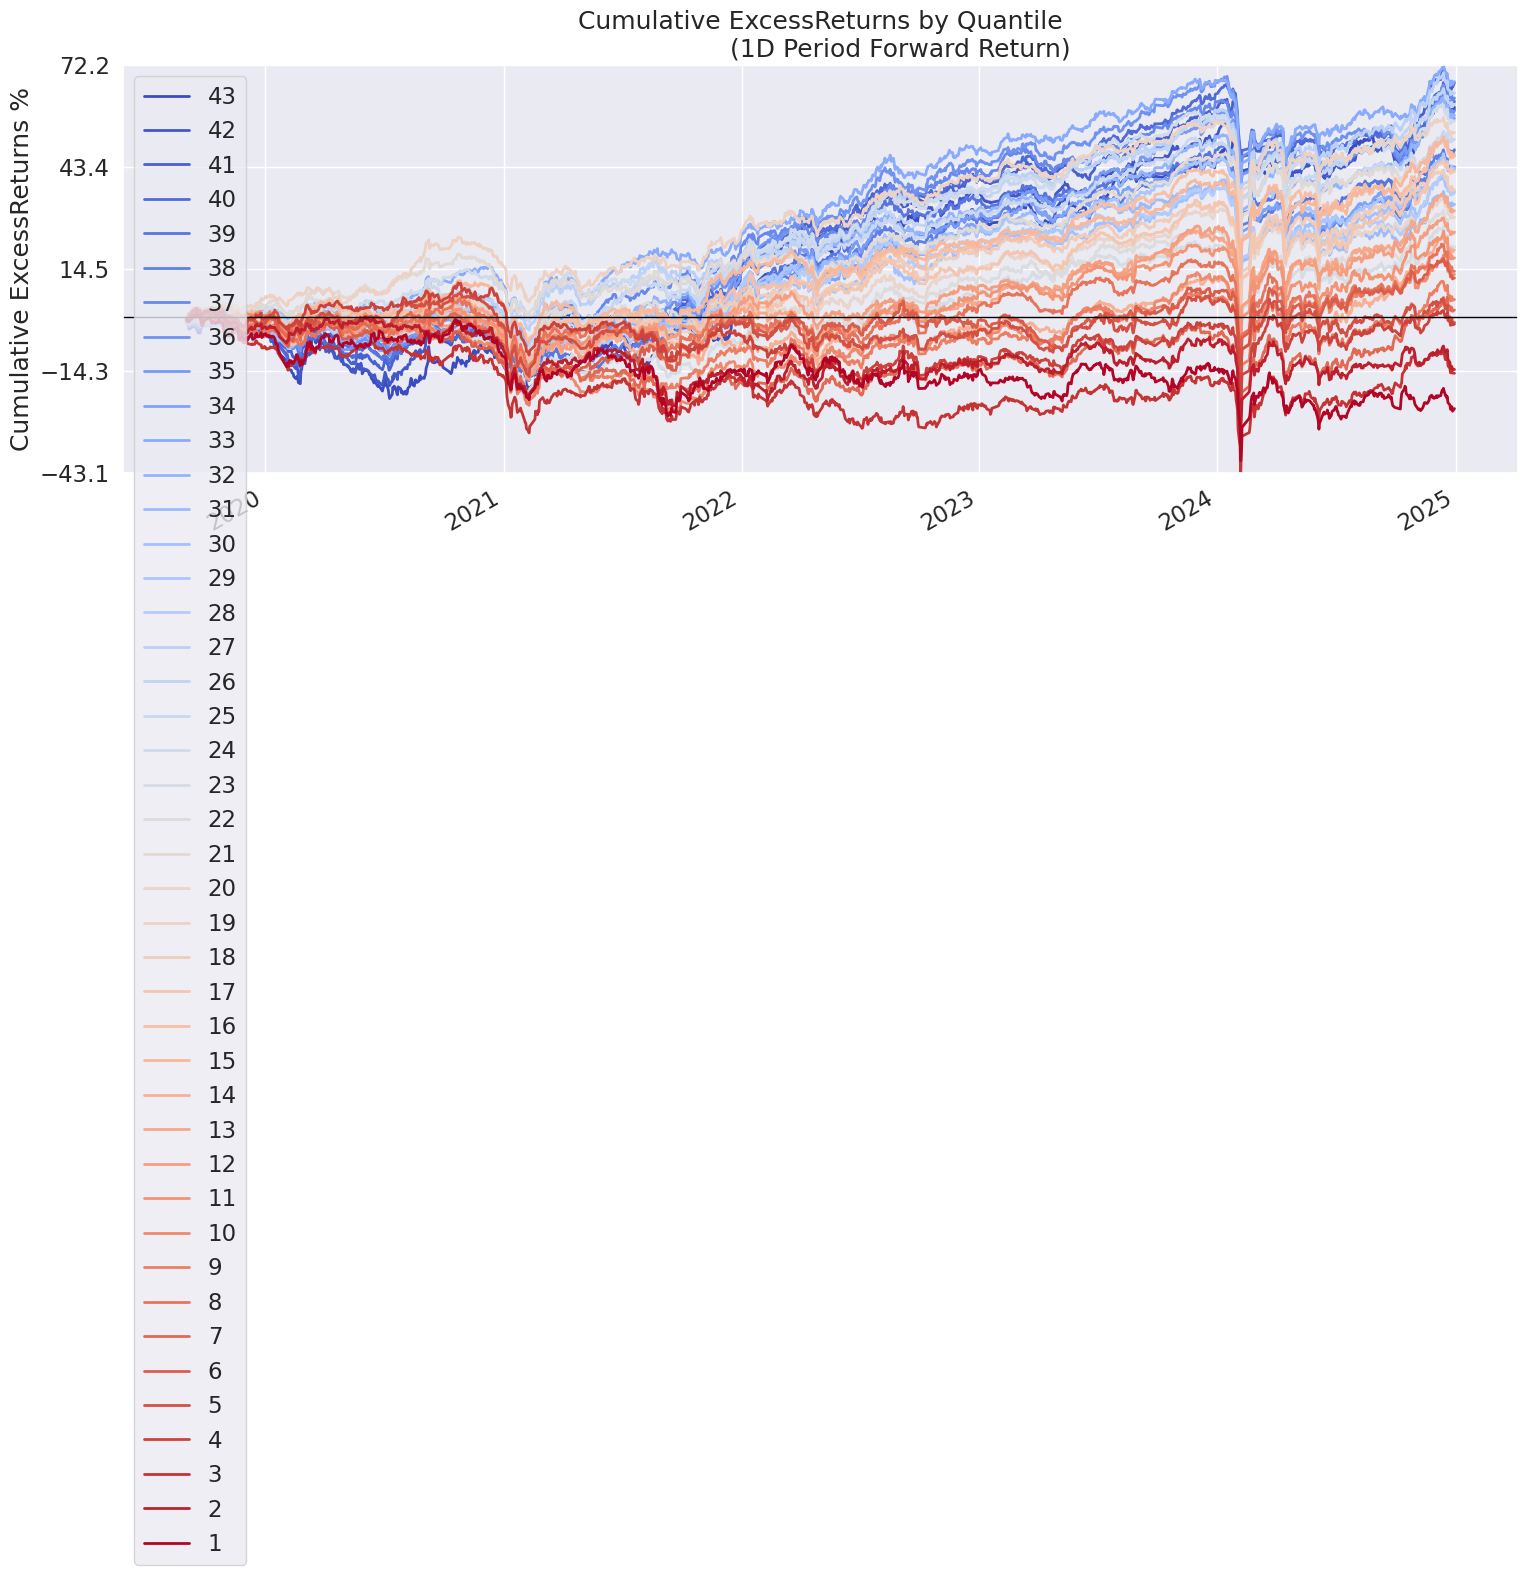

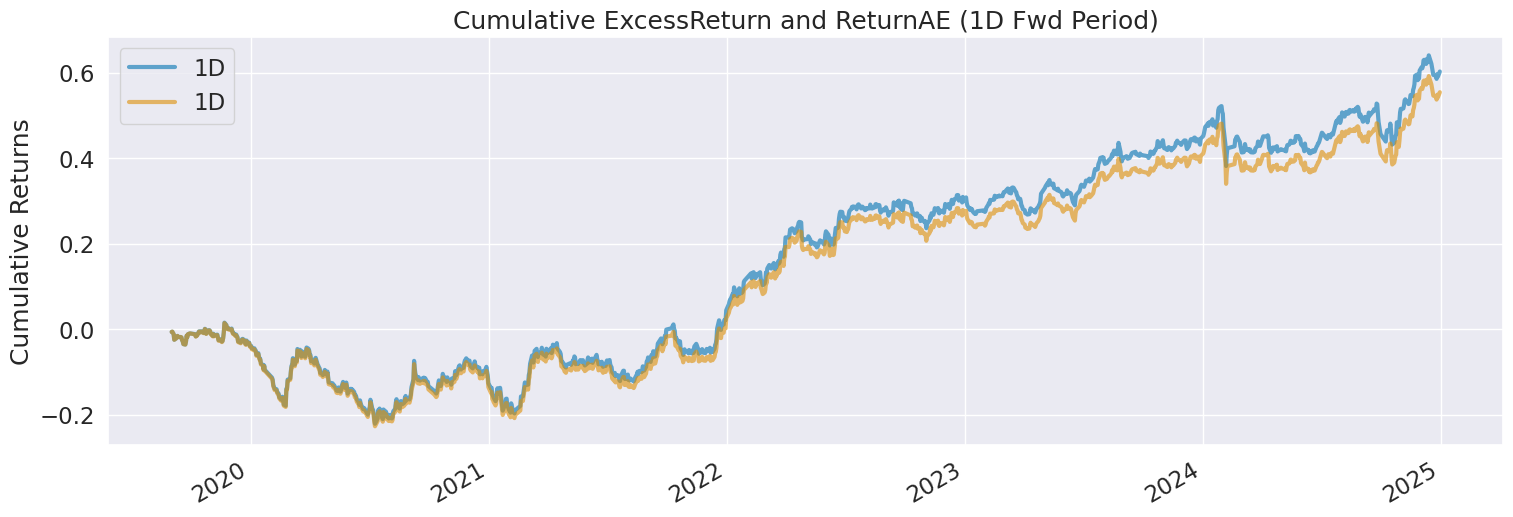

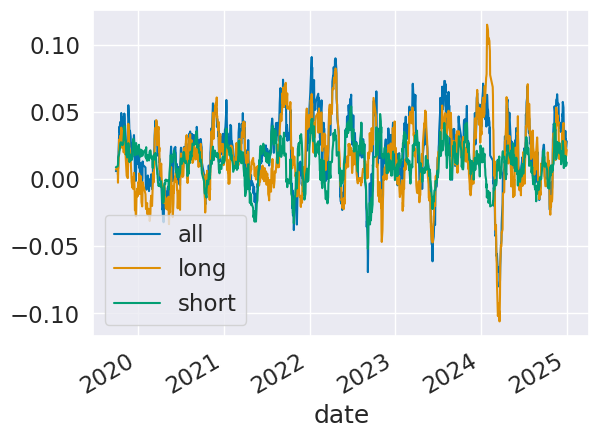

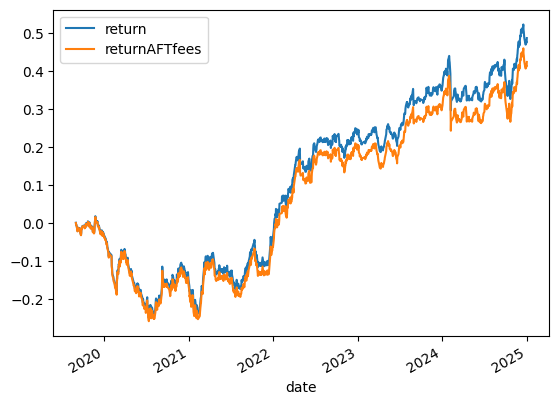

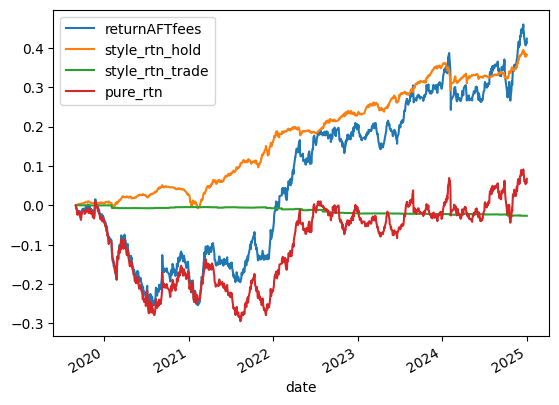

In [7]:
# start_datetime = datetime.datetime(2019, 1, 1)
# end_datetime = datetime.datetime(2024, 5, 31)

start_datetime = datetime.datetime(2019, 8, 1)
end_datetime = datetime.datetime(2024, 12, 31)

factor = peer_relative_ret()

time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
factorResults = analysis(
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    factor_objs=[factor,],
    stock_universe=stock_universe,
    benchmark=index_code,
    plot=True
)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")

# %
date_index = pd.to_datetime(
    sd.get_trade_date(
        start_datetime.strftime('%Y-%m-%d'),
        end_datetime.strftime('%Y-%m-%d')
    )['trade_date']
)
dailyExcessReturns = (
    factorResults['ret_Data']['ret_wide_ae']
        .iloc[:, -1]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyIC = (
    factorResults['IC_data_raw']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyICLong = (
    factorResults['ic_data_long']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyICShort = (
    factorResults['ic_data_short']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)

print('2023年以前')
RetCorr_Table, RetR2_Table, ICCorr_Table, ICLCorr_Table, ICSCorr_Table = corr_local_V2(
    dailyExcessReturns,
    dailyIC,
    dailyICLong,
    dailyICShort,
    lastday=datetime.datetime(2023, 12, 31),
    warnings=0.6
)
print('*'*10)
print('全样本除2024年1、2月')
RetCorr_Table, RetR2_Table, ICCorr_Table, ICLCorr_Table, ICSCorr_Table = corr_local_V2(
    dailyExcessReturns,
    dailyIC,
    dailyICLong,
    dailyICShort,
    lastday=datetime.datetime(2025, 12, 31),
    warnings=0.6
)